In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles



Querying database SummaryAllProps with constraint note not like "greedy%" for columns ['observationStartMJD', 'fiveSigmaDepth', 'filter', 'fieldRA', 'fieldDec']
Found 1915810 visits
Running:  ['opsim_Pass_fiveSigmaDepth_filter_observationStartMJD_note_not_like_greedy_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint note not like "greedy%" for columns ['observationStartMJD', 'fiveSigmaDepth', 'filter', 'fieldRA', 'fieldDec']
Found 1811969 visits
Running:  ['opsim_Pass_fiveSigmaDepth_filter_observationStartMJD_note_not_like_greedy_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


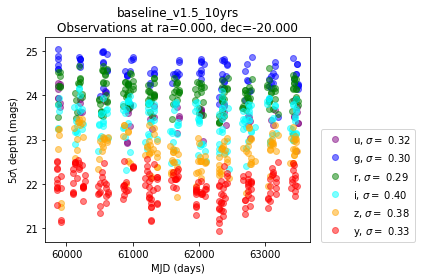

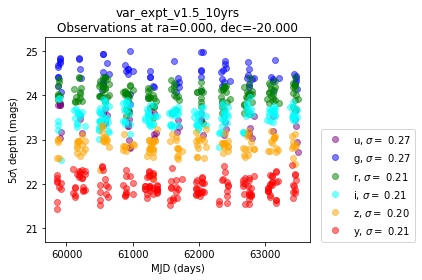

In [2]:
runnames = {'baseline_v1.5_10yrs': 'baseline/baseline_v1.5_10yrs.db',
           'var_expt_v1.5_10yrs':'var_expt/var_expt_v1.5_10yrs.db'}
outnames = ['variable_expt_plots/baseline_spot.pdf', 'variable_expt_plots/varexpt_spot.pdf']
for i,runname in enumerate(runnames):
    dbFile = 'sims_featureScheduler_runs1.5/'+runnames[runname]
    conn = db.OpsimDatabase(dbFile)
    outDir='temp'
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleList = []
    sql = 'note not like "greedy%"'
    ra=0.
    dec=-20.
    metric = metrics.PassMetric(['fiveSigmaDepth', 'filter', 'observationStartMJD'])
    slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)
    summaryStats = []
    plotDict = {}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()

    dataSlice = bundleList[0].metricValues[0]
    
    plt.figure()
    # let's make a plot
    f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}
    for fn in f2c:
        in_filt = np.where(dataSlice['filter'] == fn)[0]
        plt.plot(dataSlice['observationStartMJD'][in_filt],
                 dataSlice['fiveSigmaDepth'][in_filt], 'o',
                color=f2c[fn], label=fn+r', $\sigma=$ %.2f' % (np.std(dataSlice['fiveSigmaDepth'][in_filt])), alpha=0.5)
    plt.xlabel('MJD (days)')
    plt.ylabel(r'5$\sigma$\ depth (mags)')
    plt.ylim([20.7,25.3])
    plt.legend(loc=(1.04,0))
    plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (runname, ra,dec))
    plt.tight_layout()
    plt.savefig(outnames[i])